First, let's import the required libraries and packages

In [40]:
from google.colab import drive
from pathlib import Path
import glob
import os

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

#import json to view the json data provided
import json

#basic data analysis libraries
import pandas as pd
import numpy as np
from collections import Counter

#visualization libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from wordcloud import WordCloud
import plotly.express as px

#Text Libraries

#NLTK
#!pip install nltk
import nltk
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk import pos_tag
from nltk.tokenize import WhitespaceTokenizer
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
nltk.download('omw-1.4')

#String
import string
from textblob import TextBlob
import re
import spacy

#sklearn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD

#Gensim
import gensim
from gensim import corpora
!pip install pyLDAvis==2.1.2
import pyLDAvis
import pyLDAvis.gensim


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/rizkyario/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/rizkyario/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/rizkyario/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Error loading : Package '' not found in index
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/rizkyario/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/rizkyario/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621


Opening the JSON file using the json library

In [41]:
web='stockx'
# Opening the JSON file
json_dir = './data/stockx'

json_pattern = os.path.join(json_dir, '*.json')
file_list = glob.glob(json_pattern)

dfs = []
for file in file_list:
    with open(file) as f:
        json_data = pd.json_normalize(json.loads(f.read()))
        json_data['site'] = file.rsplit("/", 1)[-1]
    dfs.append(json_data)
df = pd.concat(dfs)
print(len(df))

1999


Opening the JSON data using Pandas

In [42]:
#Using Pandas

json_pattern = os.path.join(json_dir, '*.json')
file_list = glob.glob(json_pattern)

dfs = []
for file in file_list:
    with open(file) as f:
        json_data = pd.json_normalize(json.loads(f.read()))
        json_data['site'] = file.rsplit("/", 1)[-1]
    dfs.append(json_data)
reviewsDF = pd.concat(dfs)
reviewsDF.head(10)

,date,author,text,title,stars,location,url,site
0,2022-04-28,Craig,I placed a bid/order then did not hear anythin...,I placed a bid/order then did not hear…,1,US,https://www.trustpilot.com/review/stockx.com?p...,reviews_15.json
1,2022-04-28,Sharaf,Delivery the worst,Delivery the worst,1,US,https://www.trustpilot.com/review/stockx.com?p...,reviews_15.json
2,2022-04-28,Marcos A,Not helpful at all. Website goes around in cir...,Not helpful at all,1,US,https://www.trustpilot.com/review/stockx.com?p...,reviews_15.json
3,2022-04-29,Charles,You sold me some fake ass shoes and tried tell...,You sold me some fake ass shoes and…,1,US,https://www.trustpilot.com/review/stockx.com?p...,reviews_15.json
4,2022-04-29,Cuban,I still haven’t received anything from stock x...,No package,1,US,https://www.trustpilot.com/review/stockx.com?p...,reviews_15.json
5,2022-04-29,kamilah,I ordered the shoes and it took forever to get...,I ordered the shoes and it took forever…,1,US,https://www.trustpilot.com/review/stockx.com?p...,reviews_15.json
6,2022-04-29,Phantom,You should be able to cancel within the first ...,You should be able to cancel within the…,3,US,https://www.trustpilot.com/review/stockx.com?p...,reviews_15.json
7,2022-04-29,Kavone,"The shipping took forever, ups doesn't conduct...",The shipping took forever,3,US,https://www.trustpilot.com/review/stockx.com?p...,reviews_15.json
8,2022-04-29,Michael,"I ordered a pair of shoes off of stock x, they...",I ordered a pair of shoes off of stockx and ne...,1,US,https://www.trustpilot.com/review/stockx.com?p...,reviews_15.json
9,2022-04-29,Peter Ian Staker,its f2cking late by idk know how many days bec...,SH2T,1,AU,https://www.trustpilot.com/review/stockx.com?p...,reviews_15.json


# **Data Cleaning**

Round 1 of cleaning: 

- Converting the text to Lowercase

- Removing text in brackets

- Removing punctuation and words

In [43]:
#Round 1 of cleaning
def clean_text(text):
    # converting to lower
    text = text.lower() 
    #remove text in square brackets
    text = re.sub('\[.*?\]','',text)
    #remove punctuation and remove words
    text = re.sub('[%s]' % re.escape(string.punctuation),'',text)
    text = re.sub('\w*\d\w*','',text)
    return text

In [44]:
reviewsDF.title = reviewsDF.title.apply(clean_text)
reviewsDF.text = reviewsDF.text.apply(clean_text)
reviewsDF.head()

,date,author,text,title,stars,location,url,site
0,2022-04-28,Craig,i placed a bidorder then did not hear anything...,i placed a bidorder then did not hear…,1,US,https://www.trustpilot.com/review/stockx.com?p...,reviews_15.json
1,2022-04-28,Sharaf,delivery the worst,delivery the worst,1,US,https://www.trustpilot.com/review/stockx.com?p...,reviews_15.json
2,2022-04-28,Marcos A,not helpful at all website goes around in circ...,not helpful at all,1,US,https://www.trustpilot.com/review/stockx.com?p...,reviews_15.json
3,2022-04-29,Charles,you sold me some fake ass shoes and tried tell...,you sold me some fake ass shoes and…,1,US,https://www.trustpilot.com/review/stockx.com?p...,reviews_15.json
4,2022-04-29,Cuban,i still haven’t received anything from stock x...,no package,1,US,https://www.trustpilot.com/review/stockx.com?p...,reviews_15.json


Round 2 of Cleaning:

- Removing additional punctuation

- Removing non-sensical text

In [45]:
#Round 2 of cleaning
def clean_text2(text):
    '''get rid of some additional punctuation and non-sesical text that was missed the first time'''
    text = re.sub('[''""...]','',text)
    text = re.sub('\n','',text)
    return text

In [46]:
reviewsDF.title = reviewsDF.title.apply(clean_text2)
reviewsDF.text = reviewsDF.text.apply(clean_text2)
reviewsDF.head()

,date,author,text,title,stars,location,url,site
0,2022-04-28,Craig,i placed a bidorder then did not hear anything...,i placed a bidorder then did not hear…,1,US,https://www.trustpilot.com/review/stockx.com?p...,reviews_15.json
1,2022-04-28,Sharaf,delivery the worst,delivery the worst,1,US,https://www.trustpilot.com/review/stockx.com?p...,reviews_15.json
2,2022-04-28,Marcos A,not helpful at all website goes around in circ...,not helpful at all,1,US,https://www.trustpilot.com/review/stockx.com?p...,reviews_15.json
3,2022-04-29,Charles,you sold me some fake ass shoes and tried tell...,you sold me some fake ass shoes and…,1,US,https://www.trustpilot.com/review/stockx.com?p...,reviews_15.json
4,2022-04-29,Cuban,i still haven’t received anything from stock x...,no package,1,US,https://www.trustpilot.com/review/stockx.com?p...,reviews_15.json


Round 3 of Cleaning:

- Punctuation

- Words containing numbers

- Stopwords

- Empty tokens

- Part of Speech Tagging

- Lemmatization

- Removing one letter words

In [47]:
#Round 3 of cleaning (postag, stopwords removal and lemmatization etc)
def get_wordnet_pos(word):
    #Map POS tag to first letter
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}

    return tag_dict.get(tag, wordnet.NOUN)
    
def clean_text3(text):
    #tokenizing removing puncutation
    text = [word.strip(string.punctuation) for word in text.split(" ")]
    #removing words containing numbers
    text = [word for word in text if not any(c.isdigit() for c in word)]
    #removing stopwords
    stop = stopwords.words('english')
    text = [x for x in text if x not in stop]
    #removing empty tokens
    text = [t for t in text if len(t) > 0]
    #part of speech tagging
    pos_tags = pos_tag(text)
    #lemmatizing text
    text = [WordNetLemmatizer().lemmatize(t[0], get_wordnet_pos(t[1])) for t in pos_tags]
    #removing one letter words
    text = [t for t in text if len(t) > 1]
    #joining
    text = " ".join(text)
    return(text)

In [48]:
reviewsDF.title = reviewsDF.title.apply(clean_text3)
reviewsDF.text = reviewsDF.text.apply(clean_text3)
reviewsDF.head()

,date,author,text,title,stars,location,url,site
0,2022-04-28,Craig,placed bidorder hear anything week found item ...,placed bidorder hear…,1,US,https://www.trustpilot.com/review/stockx.com?p...,reviews_15.json
1,2022-04-28,Sharaf,delivery worst,delivery worst,1,US,https://www.trustpilot.com/review/stockx.com?p...,reviews_15.json
2,2022-04-28,Marcos A,helpful website go around circle looking link ...,helpful,1,US,https://www.trustpilot.com/review/stockx.com?p...,reviews_15.json
3,2022-04-29,Charles,sold fake as shoe tried telling would pas dead...,sold fake as shoe and…,1,US,https://www.trustpilot.com/review/stockx.com?p...,reviews_15.json
4,2022-04-29,Cuban,still haven’t received anything stock order pu...,package,1,US,https://www.trustpilot.com/review/stockx.com?p...,reviews_15.json


Save the Cleaned data for easy later use

In [49]:
#Pickling the DF for later use
reviewsDF.to_pickle(web+".pkl")

# **Feature Engineering**

Adding new columns for
1. Length
2. Word Count
3. Polarity
4. Sentiment
5. Rating
6. Website

In [50]:
#Let's add a column length, which indicates the length of each text
reviewsDF['length'] = reviewsDF['text'].apply(len)
#Adding a column numOfWords which indicates the number of words in the text
reviewsDF['numOfWords'] = reviewsDF['text'].apply(lambda x: len(x.split(" ")))
#Adding a Polarity column - using TextBlob
reviewsDF['polarity'] = reviewsDF['text'].map(lambda text: TextBlob(text).sentiment.polarity)
#Adding Sentiment Intensity column - using SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()
reviewsDF["sentiments"] = reviewsDF["text"].apply(lambda x: sid.polarity_scores(x))
reviewsDF = pd.concat([reviewsDF.drop(['sentiments'], axis=1), reviewsDF['sentiments'].apply(pd.Series)], axis=1)
reviewsDF.head()

,date,author,text,title,stars,location,url,site,length,numOfWords,polarity,neg,neu,pos,compound
0,2022-04-28,Craig,placed bidorder hear anything week found item ...,placed bidorder hear…,1,US,https://www.trustpilot.com/review/stockx.com?p...,reviews_15.json,159,21,0.000000,0.205,0.795,0.000,-0.5994
1,2022-04-28,Sharaf,delivery worst,delivery worst,1,US,https://www.trustpilot.com/review/stockx.com?p...,reviews_15.json,14,2,-1.000000,0.804,0.196,0.000,-0.6249
2,2022-04-28,Marcos A,helpful website go around circle looking link ...,helpful,1,US,https://www.trustpilot.com/review/stockx.com?p...,reviews_15.json,114,18,-0.000379,0.105,0.762,0.133,0.1531
3,2022-04-29,Charles,sold fake as shoe tried telling would pas dead...,sold fake as shoe and…,1,US,https://www.trustpilot.com/review/stockx.com?p...,reviews_15.json,72,12,-0.500000,0.220,0.780,0.000,-0.4767
4,2022-04-29,Cuban,still haven’t received anything stock order pu...,package,1,US,https://www.trustpilot.com/review/stockx.com?p...,reviews_15.json,64,10,0.000000,0.000,1.000,0.000,0.0000


In [51]:
#Adding a Sentiment column depending on the calculated compound score
reviewsDF['Sentiment'] = reviewsDF['compound'].apply(lambda c: 'pos' if c >=0 else 'neg')
reviewsDF.Sentiment.value_counts()

pos    1065
neg     934
Name: Sentiment, dtype: int64

In [52]:
#Adding a column (numeric) for rating
#reviewsDF.stars.value_counts()
reviewsDF['rating'] = reviewsDF['stars']
reviewsDF.head()

,date,author,text,title,stars,location,url,site,length,numOfWords,polarity,neg,neu,pos,compound,Sentiment,rating
0,2022-04-28,Craig,placed bidorder hear anything week found item ...,placed bidorder hear…,1,US,https://www.trustpilot.com/review/stockx.com?p...,reviews_15.json,159,21,0.000000,0.205,0.795,0.000,-0.5994,neg,1
1,2022-04-28,Sharaf,delivery worst,delivery worst,1,US,https://www.trustpilot.com/review/stockx.com?p...,reviews_15.json,14,2,-1.000000,0.804,0.196,0.000,-0.6249,neg,1
2,2022-04-28,Marcos A,helpful website go around circle looking link ...,helpful,1,US,https://www.trustpilot.com/review/stockx.com?p...,reviews_15.json,114,18,-0.000379,0.105,0.762,0.133,0.1531,pos,1
3,2022-04-29,Charles,sold fake as shoe tried telling would pas dead...,sold fake as shoe and…,1,US,https://www.trustpilot.com/review/stockx.com?p...,reviews_15.json,72,12,-0.500000,0.220,0.780,0.000,-0.4767,neg,1
4,2022-04-29,Cuban,still haven’t received anything stock order pu...,package,1,US,https://www.trustpilot.com/review/stockx.com?p...,reviews_15.json,64,10,0.000000,0.000,1.000,0.000,0.0000,pos,1


In [53]:
#Analyzing URL column
reviewsDF.url.str.split("review/")[0]
reviewsDF['Site'] = reviewsDF.url.apply(lambda x: x.split("review/")[1])
reviewsDF.head()

,date,author,text,title,stars,location,url,site,length,numOfWords,polarity,neg,neu,pos,compound,Sentiment,rating,Site
0,2022-04-28,Craig,placed bidorder hear anything week found item ...,placed bidorder hear…,1,US,https://www.trustpilot.com/review/stockx.com?p...,reviews_15.json,159,21,0.000000,0.205,0.795,0.000,-0.5994,neg,1,stockx.com?page=15&stars=1&stars=2&stars=3
1,2022-04-28,Sharaf,delivery worst,delivery worst,1,US,https://www.trustpilot.com/review/stockx.com?p...,reviews_15.json,14,2,-1.000000,0.804,0.196,0.000,-0.6249,neg,1,stockx.com?page=15&stars=1&stars=2&stars=3
2,2022-04-28,Marcos A,helpful website go around circle looking link ...,helpful,1,US,https://www.trustpilot.com/review/stockx.com?p...,reviews_15.json,114,18,-0.000379,0.105,0.762,0.133,0.1531,pos,1,stockx.com?page=15&stars=1&stars=2&stars=3
3,2022-04-29,Charles,sold fake as shoe tried telling would pas dead...,sold fake as shoe and…,1,US,https://www.trustpilot.com/review/stockx.com?p...,reviews_15.json,72,12,-0.500000,0.220,0.780,0.000,-0.4767,neg,1,stockx.com?page=15&stars=1&stars=2&stars=3
4,2022-04-29,Cuban,still haven’t received anything stock order pu...,package,1,US,https://www.trustpilot.com/review/stockx.com?p...,reviews_15.json,64,10,0.000000,0.000,1.000,0.000,0.0000,pos,1,stockx.com?page=15&stars=1&stars=2&stars=3


In [54]:
reviewsDF.Site.value_counts()

stockx.com?page=15&stars=1&stars=2&stars=3    20
stockx.com?page=11&stars=1&stars=2&stars=3    20
stockx.com?page=67&stars=1&stars=2&stars=3    20
stockx.com?page=30&stars=1&stars=2&stars=3    20
stockx.com?page=26&stars=1&stars=2&stars=3    20
                                              ..
stockx.com?page=25&stars=1&stars=2&stars=3    20
stockx.com?page=72&stars=1&stars=2&stars=3    20
stockx.com?page=48&stars=1&stars=2&stars=3    20
stockx.com?page=82&stars=1&stars=2&stars=3    20
stockx.com?page=75&stars=1&stars=2&stars=3    19
Name: Site, Length: 100, dtype: int64

# **EDA**

Exploratory Data Analysis

In [55]:
#This function is used to see mathematical metrics of all the columns 
reviewsDF.describe()

,stars,length,numOfWords,polarity,neg,neu,pos,compound,rating
count,1999.000000,1999.000000,1999.000000,1999.000000,1999.000000,1999.000000,1999.000000,1999.000000,1999.000000
mean,1.456728,171.669335,25.662331,-0.033258,0.151944,0.740132,0.107426,-0.080629,1.456728
std,0.806631,216.181768,31.850259,0.287590,0.166645,0.192301,0.136237,0.487218,0.806631
min,1.000000,0.000000,1.000000,-1.000000,0.000000,0.000000,0.000000,-0.990300,1.000000
25%,1.000000,47.500000,7.000000,-0.130722,0.000000,0.623000,0.000000,-0.476700,1.000000
50%,1.000000,104.000000,16.000000,0.000000,0.120000,0.741000,0.071000,0.000000,1.000000
75%,2.000000,212.000000,32.000000,0.100000,0.226000,0.881000,0.172000,0.273200,2.000000
max,5.000000,3047.000000,465.000000,1.000000,1.000000,1.000000,1.000000,0.985400,5.000000


In [56]:
#To see the type of each column and check if there are any null values 
reviewsDF.date = pd.to_datetime(reviewsDF['date'])
reviewsDF = reviewsDF[reviewsDF.stars < 4]
reviewsDF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1982 entries, 0 to 19
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        1982 non-null   datetime64[ns]
 1   author      1982 non-null   object        
 2   text        1982 non-null   object        
 3   title       1982 non-null   object        
 4   stars       1982 non-null   int64         
 5   location    1982 non-null   object        
 6   url         1982 non-null   object        
 7   site        1982 non-null   object        
 8   length      1982 non-null   int64         
 9   numOfWords  1982 non-null   int64         
 10  polarity    1982 non-null   float64       
 11  neg         1982 non-null   float64       
 12  neu         1982 non-null   float64       
 13  pos         1982 non-null   float64       
 14  compound    1982 non-null   float64       
 15  Sentiment   1982 non-null   object        
 16  rating      1982 non-null 

In [57]:
#To count number of samples for each rating
reviewsDF.rating.value_counts()

1    1439
3     303
2     240
Name: rating, dtype: int64

<AxesSubplot:>

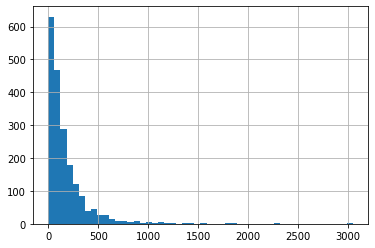

In [58]:
# Review length distribution
reviewsDF['length'].hist(bins=50)

array([[<AxesSubplot:title={'center':'1'}>,
        <AxesSubplot:title={'center':'2'}>],
       [<AxesSubplot:title={'center':'3'}>, <AxesSubplot:>]], dtype=object)

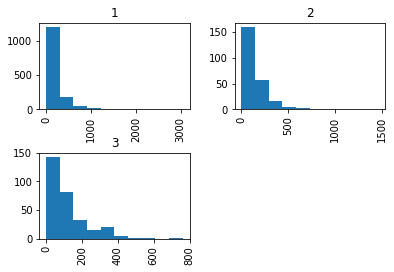

In [59]:
#Histogram plot to see the lenght of each rating
reviewsDF.hist(column = 'length', by = 'rating')

In [60]:
#Histogram plot to analyze number of reviews with respect to date
#As we can see, 2018 has many reviews comapared to other years
fig = px.histogram(reviewsDF, x='date', title='Reviews by date')
fig.update_xaxes(categoryorder='category descending', title='Date').update_yaxes(title='Number of reviews')
fig.show()

In [61]:
#Histogram plot to analyze number of reviews with respect to date and ratings
#As we can see there are many one star ratings compared to all other ratings 
fig = px.histogram(reviewsDF, x='date',  title='Reviews by date', color='rating', nbins=10, log_y=True, barmode='group')
fig.update_xaxes(categoryorder='category descending', title='Date').update_yaxes(title='Number of reviews')
fig.show()

<AxesSubplot:>

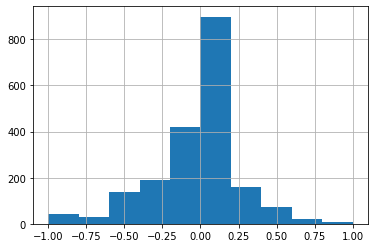

In [62]:
#Histogram plot for polarity, and by observing we say that there are many reviwes with the polarity between 0 to 0.25
reviewsDF.polarity.hist()

<AxesSubplot:>

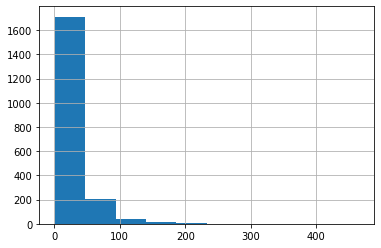

In [63]:
#Plot to analyze number of words
reviewsDF['numOfWords'].hist()

In [64]:
#top positive reviews
reviewsDF.sort_values("pos", ascending = False)[["text", "pos", "neg", "stars"]].head(20)

,text,pos,neg,stars
3,good,1.000,0.0,1
14,ok wow,1.000,0.0,2
7,may great fan,0.865,0.0,2
9,authentication amazing,0.792,0.0,1
6,packaging trustable,0.767,0.0,3
14,good morning,0.744,0.0,3
7,size good,0.744,0.0,2
19,shoelace good,0.744,0.0,3
10,take profit,0.744,0.0,1
9,pretty great shipping take time everything good,0.718,0.0,3


In [65]:
#Analyzing the negative data - ascending order 
reviewsDF.sort_values("neg", ascending = False)[["text", "pos", "neg", "stars"]].head(20)

,text,pos,neg,stars
12,charged,0.0,1.000,1
4,disappointed,0.0,1.000,1
17,fake product scam,0.0,0.872,1
1,delivery worst,0.0,0.804,1
14,worst website,0.0,0.804,1
7,scam buy,0.0,0.787,1
9,scam basically,0.0,0.787,1
10,bad business,0.0,0.778,1
1,chicago mids fake scam,0.0,0.773,1
0,disgusting order,0.0,0.773,1


In [66]:
# reviewsDF['length'][1234]

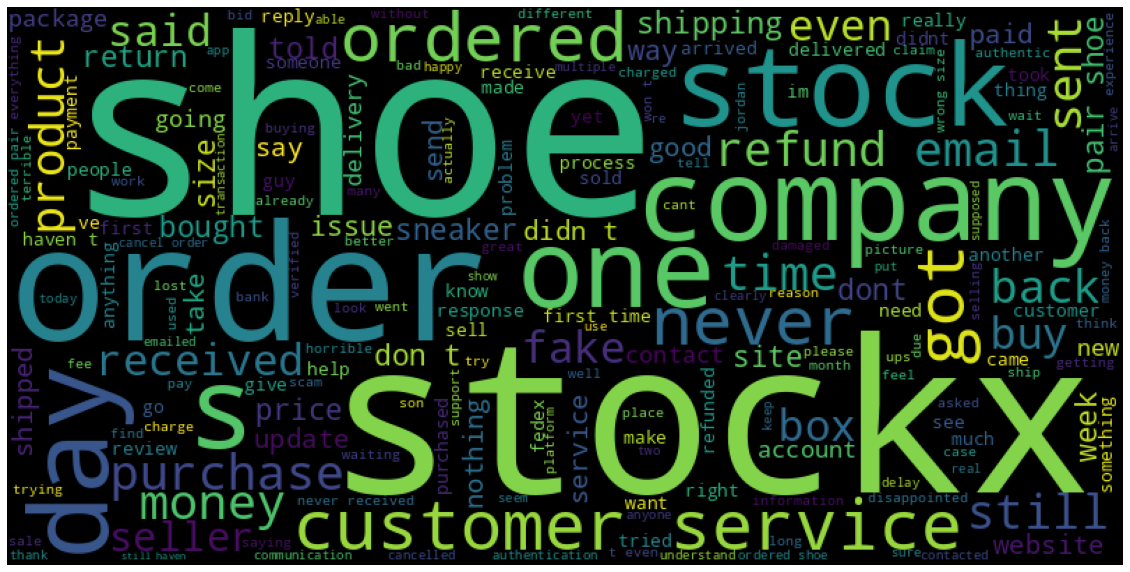

In [67]:
#WordCloud of text in the complete data set
from wordcloud import STOPWORDS

stopwords = ['item', 'vc', 'vestiaire', 'm', 'ive'] + list(STOPWORDS)

text = " ".join(i for i in reviewsDF.text)
wordcloud = WordCloud(stopwords = stopwords, width=800, height=400).generate(text)
fig = plt.figure(1, figsize = (20, 20))
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

In [68]:
#Percentage of each word in the wordcloud
wordcloud.words_

{'shoe': 1.0,
 'stockx': 0.7296767874632712,
 'order': 0.4632713026444662,
 'company': 0.2683643486777669,
 's': 0.2654260528893242,
 'stock': 0.2605288932419197,
 'one': 0.24877571008814886,
 'day': 0.24191968658178256,
 'customer service': 0.22233104799216455,
 'ordered': 0.21449559255631734,
 'got': 0.21253672869735554,
 'never': 0.20861900097943192,
 'purchase': 0.20176297747306562,
 'sent': 0.2007835455435847,
 'time': 0.197845249755142,
 'email': 0.1958863858961802,
 'money': 0.1929480901077375,
 'product': 0.1831537708129285,
 'refund': 0.1831537708129285,
 'still': 0.1802154750244858,
 'back': 0.1743388834476004,
 'received': 0.17042115572967678,
 'buy': 0.16748285994123407,
 'box': 0.16748285994123407,
 'said': 0.16356513222331048,
 'fake': 0.16062683643486778,
 'even': 0.16062683643486778,
 'seller': 0.15768854064642507,
 'shipping': 0.15572967678746327,
 'don t': 0.14691478942213515,
 'sneaker': 0.14593535749265427,
 'week': 0.14495592556317335,
 'price': 0.14397649363369247

# **Topic Modelling**

In [69]:
reviewData = reviewsDF['text']
tfidf_vectorizer = TfidfVectorizer(stop_words='english', use_idf=True, smooth_idf=True)
reviewData = reviewData.values
document_term_matrix = tfidf_vectorizer.fit_transform(reviewData)

In [70]:
#Let's consider the top 20 topics
n_topics = 20
lsa_model = TruncatedSVD(n_components=n_topics)
lsa_topic_matrix = lsa_model.fit_transform(document_term_matrix)

In [71]:
def getCategoriesCounts(lsa_topic_matrix):
  keys = lsa_topic_matrix.argmax(axis=1).tolist()
  count_pairs = Counter(keys).items()
  categories = [pair[0] for pair in count_pairs]
  counts = [pair[1] for pair in count_pairs]
  return (keys,categories, counts)

In [72]:
lsa_keys, lsa_categories, lsa_counts = getCategoriesCounts(lsa_topic_matrix)

In [73]:
def get_top_n_words(n, keys, document_term_matrix, tfidf_vectorizer):
    top_indices = []
    for topic in range(n_topics):
        temp_vector_sum = 0
        for i in range(len(keys)):
            if keys[i] == topic:
                temp_vector_sum += document_term_matrix[i]
        if hasattr(temp_vector_sum, 'toarray'):
            temp_vector_sum = temp_vector_sum.toarray()
            top_n_word_indices = np.flip(np.argsort(temp_vector_sum)[0][-n:],0)
            top_indices.append(top_n_word_indices)   
        else:
            top_indices.append([])
    top_words = []
    for topic in top_indices:
        topic_words = []
        for index in topic:
            temp_word_vector = np.zeros((1,document_term_matrix.shape[1]))
            temp_word_vector[:,index] = 1
            the_word = tfidf_vectorizer.inverse_transform(temp_word_vector)[0][0]
            topic_words.append(the_word.encode('ascii').decode('utf-8'))
        top_words.append(" ".join(topic_words))         
    return top_words

In [74]:
top_n_words_lsa = get_top_n_words(3, lsa_keys, document_term_matrix, tfidf_vectorizer)
for i in range(len(top_n_words_lsa)):
    print("Topic {}: ".format(i+1), top_n_words_lsa[i])

Topic 1:  shoe stockx order
Topic 2:  order received cancelled
Topic 3:  long took shipping
Topic 4:  shoe came received
Topic 5:  package received fedex
Topic 6:  size wrong return
Topic 7:  got package week
Topic 8:  got order service
Topic 9:  service customer bad
Topic 10:  item receive fee
Topic 11:  fee high price
Topic 12:  product fake got
Topic 13:  sneaker didn receive
Topic 14:  fake dont shoe
Topic 15:  refund pair money
Topic 16:  product slow time
Topic 17:  day seller took
Topic 18:  return shipping delay
Topic 19:  way charged expensive
Topic 20:  good return bought


We can see the top 20 topics in the whole dataset

Now let's compare the topics year by year

In [75]:
reviewsDF.date.describe()

count                    1982
unique                    188
top       2022-04-27 00:00:00
freq                       50
first     2021-10-22 00:00:00
last      2022-05-08 00:00:00
Name: date, dtype: object

In [76]:
reviewsDF.date.dt.year.value_counts() #to know the years of the available data

2022    1663
2021     319
Name: date, dtype: int64

In [77]:
#subset the full dataset into yearly dataframes
reviewsDF2020 = reviewsDF[reviewsDF.date.dt.year==2020]
reviewsDF2021 = reviewsDF[reviewsDF.date.dt.year==2021]
reviewsDF2022 = reviewsDF[reviewsDF.date.dt.year==2022]

Let's perform LSA to understand the topics for each year

In [78]:
#2020
reviewData = reviewsDF2020['text']
tfidf_vectorizer = TfidfVectorizer(stop_words='english', use_idf=True, smooth_idf=True)
reviewData = reviewData.values
document_term_matrix = tfidf_vectorizer.fit_transform(reviewData)
#Let's consider the top 2 topics
n_topics = 10
lsa_model = TruncatedSVD(n_components=n_topics)
lsa_topic_matrix = lsa_model.fit_transform(document_term_matrix)
lsa_keys, lsa_categories, lsa_counts = getCategoriesCounts(lsa_topic_matrix)
top_n_words_lsa = get_top_n_words(3, lsa_keys, document_term_matrix, tfidf_vectorizer)
top_2020 = top_n_words_lsa
for i in range(len(top_n_words_lsa)):
    print("Topic {}: ".format(i+1), top_n_words_lsa[i])

ValueError: empty vocabulary; perhaps the documents only contain stop words

In [ ]:
#2021
reviewData = reviewsDF2021['text']
tfidf_vectorizer = TfidfVectorizer(stop_words='english', use_idf=True, smooth_idf=True)
reviewData = reviewData.values
document_term_matrix = tfidf_vectorizer.fit_transform(reviewData)
#Let's consider the top 14 topics
n_topics = 10
lsa_model = TruncatedSVD(n_components=n_topics)
lsa_topic_matrix = lsa_model.fit_transform(document_term_matrix)
lsa_keys, lsa_categories, lsa_counts = getCategoriesCounts(lsa_topic_matrix)
top_n_words_lsa = get_top_n_words(3, lsa_keys, document_term_matrix, tfidf_vectorizer)
top_2021 = top_n_words_lsa
for i in range(len(top_n_words_lsa)):
    print("Topic {}: ".format(i+1), top_n_words_lsa[i])

In [ ]:
#2022
reviewData = reviewsDF2022['text']
tfidf_vectorizer = TfidfVectorizer(stop_words='english', use_idf=True, smooth_idf=True)
reviewData = reviewData.values
document_term_matrix = tfidf_vectorizer.fit_transform(reviewData)
#Let's consider the top 15 topics
n_topics = 10
lsa_model = TruncatedSVD(n_components=n_topics)
lsa_topic_matrix = lsa_model.fit_transform(document_term_matrix)
lsa_keys, lsa_categories, lsa_counts = getCategoriesCounts(lsa_topic_matrix)
top_n_words_lsa = get_top_n_words(3, lsa_keys, document_term_matrix, tfidf_vectorizer)
top_2022 = top_n_words_lsa
for i in range(len(top_n_words_lsa)):
    print("Topic {}: ".format(i+1), top_n_words_lsa[i])

Visualizing the word cloud for each year to understand the most common words

In [ ]:
#2020

text = " ".join(i for i in reviewsDF2020.text)
wordcloud = WordCloud(stopwords = stopwords, width=800, height=400).generate(text)
fig = plt.figure(1, figsize = (20, 20))
plt.axis('off')
plt.imshow(wordcloud2020)
plt.show()

In [ ]:
#2021

text = " ".join(i for i in reviewsDF2021.text)
wordcloud = WordCloud(stopwords = stopwords, width=800, height=400).generate(text)
fig = plt.figure(1, figsize = (20, 20))
plt.axis('off')
plt.imshow(wordcloud2021)
plt.show()

In [ ]:
#2022

text = " ".join(i for i in reviewsDF2022.text)
wordcloud = WordCloud(stopwords = stopwords, width=800, height=400).generate(text)
fig = plt.figure(1, figsize = (20, 20))
plt.axis('off')
plt.imshow(wordcloud2022)
plt.show()

In [ ]:
#Let's create a df with the top topics for all the years
l1,l5,l6=len(top_2020),len(top_2021),len(top_2022)
max_len = max(l1,l5,l6,l7,l8)

if not max_len == l1:
  top_2020.extend(['-']*(max_len-l1))
if not max_len == l5:
  top_2021.extend(['-']*(max_len-l5))
if not max_len == l6:
  top_2022.extend(['-']*(max_len-l6))

topicsDF = pd.DataFrame({'2020':top_2020,'2021':top_2021,'2022':top_2022})
topicsDF

Even though we have the top topics for each year, it is difficult to infer how the trend has changed over the years!  

In [ ]:
reviewsDF

As the number of reviews in 2011 is very less, lets plot the polarity for the remaining years in terms of time

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2,figsize=(15,10))
#reviewsDF2011.plot.line(x='date',y='polarity',ax=axes[0,0])
reviewsDF2020.plot.line(x='date',y='polarity',ax=axes[0,0],title='2020')
reviewsDF2021.plot.line(x='date',y='polarity',ax=axes[0,1],title='2021')
reviewsDF2022.plot.line(x='date',y='polarity',ax=axes[1,0],title='2022')

In [ ]:
#Let's create a DF with the total number of positive and negative reviews detected for each year
sentimentDF = pd.DataFrame(0,range(5),columns=['Year','pos','neg'])
sentimentDF

In [ ]:
sentimentDF.loc[0] = [2020,reviewsDF2020.Sentiment.value_counts()['pos'],reviewsDF2020.Sentiment.value_counts()['neg']]
sentimentDF.loc[1] = [2021,reviewsDF2021.Sentiment.value_counts()['pos'],reviewsDF2021.Sentiment.value_counts()['neg']]
sentimentDF.loc[2] = [2022,reviewsDF2022.Sentiment.value_counts()['pos'],reviewsDF2022.Sentiment.value_counts()['neg']]

In [ ]:
sentimentDF

In [ ]:
#Plot of positive vs negative reviews over the years
sentimentDF.plot.line(x='Year')

# **LDA & Topic trend**

Now, even though the LSA provided the topics, let's analyze the topics using LDA in order to analyze the trend and to better visualize the topics 

In [ ]:
df = reviewsDF
df

In [ ]:
warnings.filterwarnings('ignore')

reviews = list(df['text'])
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])
reviews = pd.Series(reviews).apply(lambda x: x.split())
r1 = []
for wrd in reviews:
  doc = nlp(" ".join(wrd))
  r1.append([token.lemma_ for token in doc if token.pos_ in ['NOUN','ADJ']])

reviewsR1 = r1

In [ ]:
#LDA
dictionary = corpora.Dictionary(reviewsR1)
doc_term_matrix = [dictionary.doc2bow(rev) for rev in reviewsR1]

In [ ]:
# Creating the object for LDA model using gensim library
LDA = gensim.models.ldamodel.LdaModel
# Build LDA model
lda_model = LDA(corpus=doc_term_matrix, id2word=dictionary, num_topics=20, random_state=42,chunksize=1000, passes=50)

In [ ]:
#The top 20 topics that the LDA model has learned are
lda_model.print_topics()

In [ ]:
#Just to check the correctness
lda_model.get_document_topics(doc_term_matrix[1])

Using the **pyLDAvis** let's visualize the topics and relations

In [ ]:
#Visualizing using the pyLDAvis inbuilt viz
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, doc_term_matrix, dictionary)
vis

In [ ]:
#Let's add a new column in the main df to get the topic number for each review
doc_lda = lda_model[doc_term_matrix]
max_topics = [max(sent, key=lambda x: x[1])[0] for sent in doc_lda]

In [ ]:
dftopic = df
dftopic['topic'] = max_topics

In [ ]:
dftopic

In [ ]:
#the topics for the whole df
dftopic.topic.value_counts()

In [ ]:
#Topic numbers for the year 2020
topic2020 = dftopic[dftopic.date.dt.year==2020]['topic'].value_counts().index.tolist()

In [ ]:
#Topic numbers for the year 2021
topic2021 = dftopic[dftopic.date.dt.year==2021]['topic'].value_counts().index.tolist()

In [ ]:
#Topic numbers for the year 2022
topic2022 = dftopic[dftopic.date.dt.year==2022]['topic'].value_counts().index.tolist()

The topics learned for each Year

In [ ]:
print("2020 - ",topic2020,"\n2021 - ",topic2021,"\n2022 - ",topic2022)

The list of all the topics learned with the LDA model

In [ ]:
for i in range(len(lda_model.print_topics())):
  print("Topic:%i" %i ," - ", lda_model.print_topics()[i][1], '\n')

We can see from above that:

In 2011: There are only 2 topics - Topic #15 and Topic#0

In [ ]:
lda_model.print_topics()[0][1]

In [ ]:
list(set(topic2020).intersection(topic2021))

From 2011 to 2015 there are two common topics

In [ ]:
list(set(topic2020).intersection(topic2022))

We can see that from 2015 to 2016 Topic #0 and #15 have been continued, and many more topics have been added

In [ ]:
list(set(topic2021).intersection(topic2022))

In [ ]:
for i in range(20):
  print("Topic:%i" %i )
  print(df[df.topic == i]['rating'].value_counts().index[0])

we can see that almost all the topics have the highest number of negative reviews except Topic #6 and #3

From the above learned topics, let's consider one of the most common topic #10 that has been talked about since 2015, which indicates it's one of the most important things people are talking about 

In [ ]:
#Let's see some reviews with the topic #10
list(df[df.topic == 10]['text'][:20])

In [ ]:
df[df.topic == 10]['rating'].value_counts()

We can see from above that most of the reviews are negative, and almost more thatn 75% of the reviews have a 1-star rating. So, we can confirm that this is one of the most important topic people have been talking about over the years.

Similarly we can analyze the rest of the topics depending on the requirement, and how the service wants to be improved, for example if they want to improve the Application, they can see the topic most related to "app" and then do the same analysis as above. 